# Deep Learning

Subcategoría de ML que crea diferentes niveles de abstracción que representa los datos.

### ¿Qué es ReLU?

Función de activación, permite el paso de todos los valores positivos sin cambiarlos pero asigna todos los valores negativos a 0.

## TensorFlow

Biblioteca de código abierto desarrollado por Google capaz de construir y entrenar redes neuronales.

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


# Red Neuronal Convolucional
Modelan de forma consecutiva pequeñas piezas de información, al final combinan información en las capas más profundas de la red

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
train_images.shape

(60000, 28, 28)

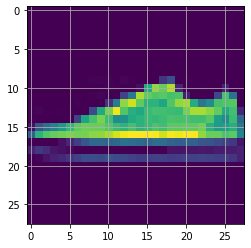

In [20]:
plt.figure()
plt.imshow(train_images[5721])
plt.grid(True)

In [21]:
train_images = train_images / 255.0
test_images = test_images / 255.0

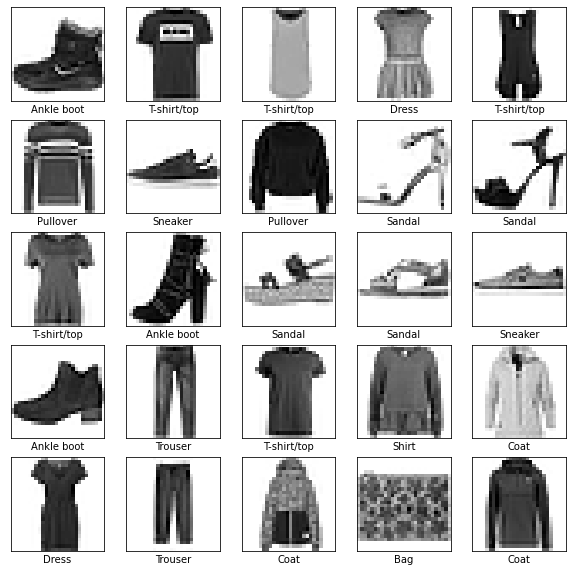

In [22]:
%matplotlib inline

plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [23]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)), 
                          keras.layers.Dense(128, activation = tf.nn.relu),
                          keras.layers.Dense(10, activation = tf.nn.softmax)])

In [24]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 696us/step - loss: 0.6277 - accuracy: 0.7833
Epoch 2/5
1875/1875 [==============================] - 1s 691us/step - loss: 0.3837 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 1s 699us/step - loss: 0.3369 - accuracy: 0.8788
Epoch 4/5
1875/1875 [==============================] - 1s 691us/step - loss: 0.3051 - accuracy: 0.8887
Epoch 5/5
1875/1875 [==============================] - 1s 694us/step - loss: 0.2942 - accuracy: 0.8928


In [26]:
test_loss, test_Acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 458us/step - loss: 0.3501 - accuracy: 0.8750


In [28]:
predictions = model.predict(test_images)

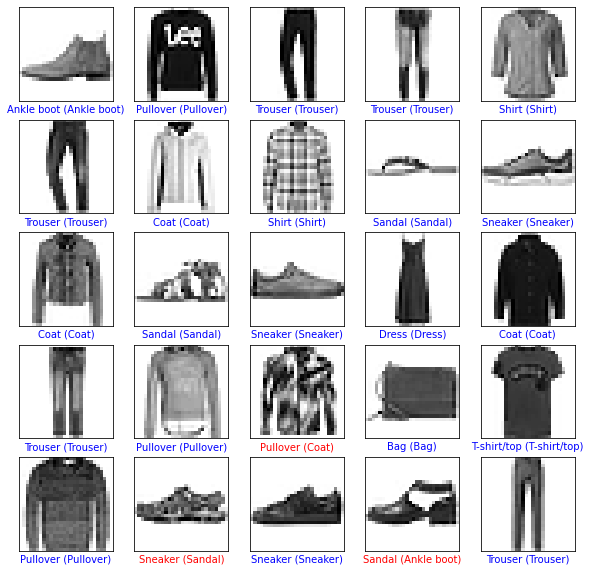

In [33]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)